<a href="https://colab.research.google.com/github/safacharfi/ReviewClassifier/blob/main/Text_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb

import numpy as np


In [9]:
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000) # This argument tells the load_data() function to only consider the 10,000 most frequent words in the dataset. Words that are less frequent will be ignored.

In [4]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

**Overview**
1. **Original `word_index`**:
   Let's say your original `word_index` looks like this:
   {
       'the': 1,
       'and': 2,
       'to': 3,
   }

2. **Adjusting Indices**:
   After running the dictionary comprehension:
   word_index = {k: (v + 3) for k, v in word_index.items()}
   The `word_index` will now look like this:
   {
       'the': 4,   # 1 + 3
       'and': 5,   # 2 + 3
       'to': 6,    # 3 + 3
   }

3. **Adding Special Tokens**:
   After this adjustment, you add the special tokens:
   word_index["<PAD>"] = 0       # Padding token
   word_index["<START>"] = 1     # Start of sequence token
   word_index["<UNK>"] = 2       # Unknown token
   word_index["<UNUSED>"] = 3    # Unused token
   Now the complete `word_index` will look like this:
   {
       '<PAD>': 0,       # Padding token
       '<START>': 1,     # Start of sequence token
       '<UNK>': 2,       # Unknown token
       '<UNUSED>': 3,    # Unused token
       'the': 4,        # Adjusted index
       'and': 5,        # Adjusted index
       'to': 6,         # Adjusted index
   }

### Summary:
- The adjustment of the original indices by adding 3 ensures that the special tokens can be assigned their own indices (`0` for `<PAD>`, `1` for `<START>`, etc.) without overlapping with the indices of the actual words in the dataset.
- The final `word_index` dictionary contains both the special tokens and the adjusted word indices.

In [11]:
# Get the word index dictionary
word_index = imdb.get_word_index()

# Adjust the indices to account for special tokens
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3

In [12]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()]) #Accessing Words by Index: The original word_index maps words to their corresponding indices. However, during model predictions or when processing text, you may want to convert indices back into words. The reverse mapping allows you to do this easily.

In [13]:
#decode into human words
def decode_review(text):
  return " ".join([reverse_word_index.get(i,"?") for i in text])
print(decode_review(test_data[0]))

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss


In [14]:
#the reviews doesn't have the same length =>we need to know the length to give it to the model as entry
#we gonna define a max length as a const as a solution ==>normilize the data
#keras.preprocessing.sequence.pad_sequences:This function is part of Keras's preprocessing utilities and is specifically designed to standardize the lengths of sequences.
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index["<PAD>"],padding="post",maxlen=250)
test_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index["<PAD>"],padding="post",maxlen=250)






*why we used the embedded Layer?**
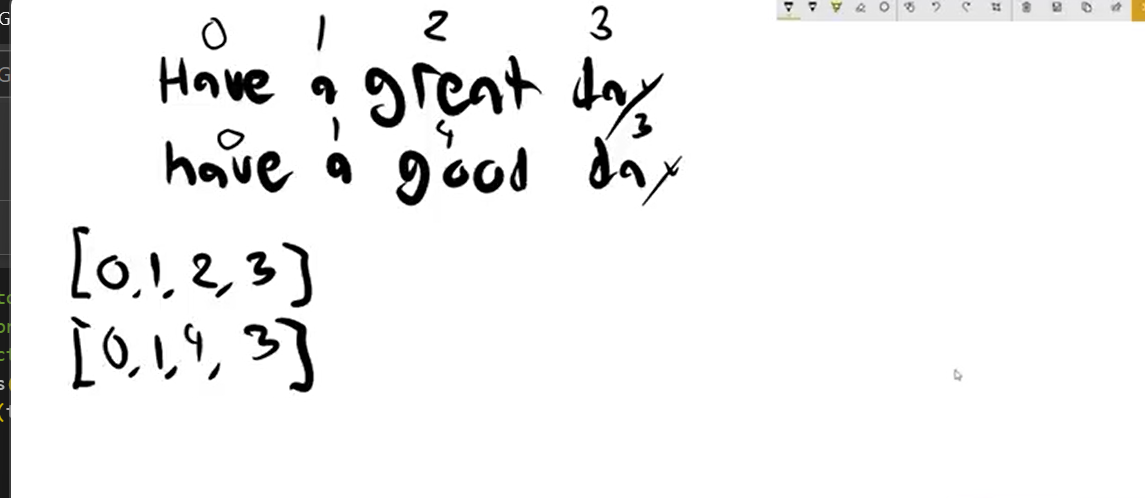

the problem the computer will compare:2 and 4 and he will say that this is different even when they are similar
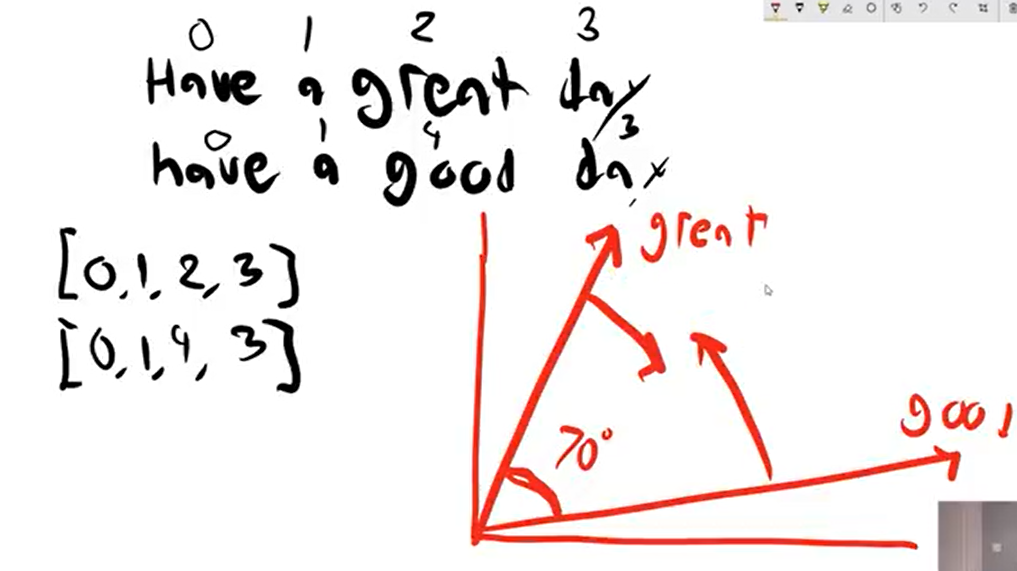
==>we want great and good be closer (as they have same meaning)
Embedded layer: words vectors
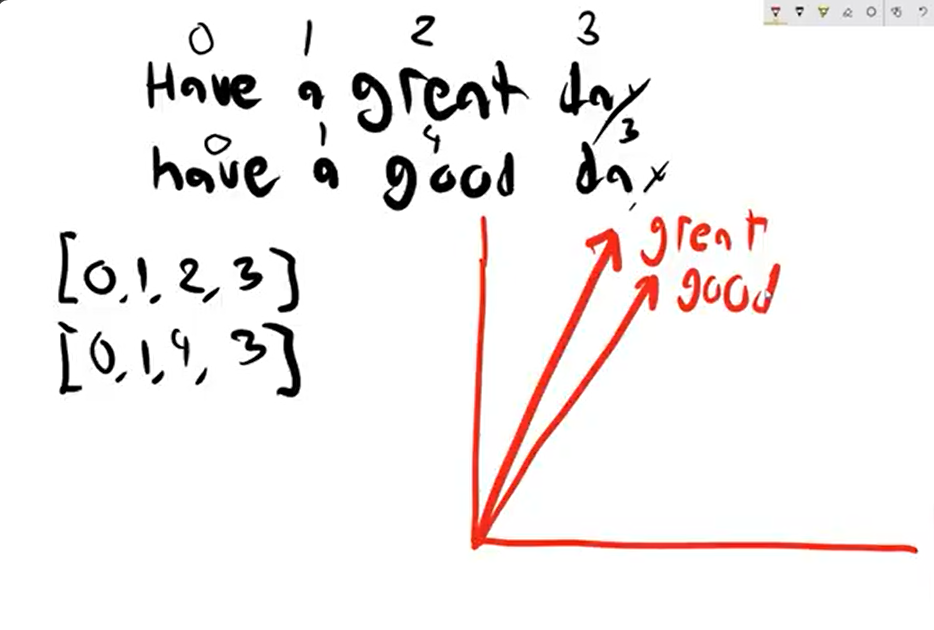



**Our model Architecture**
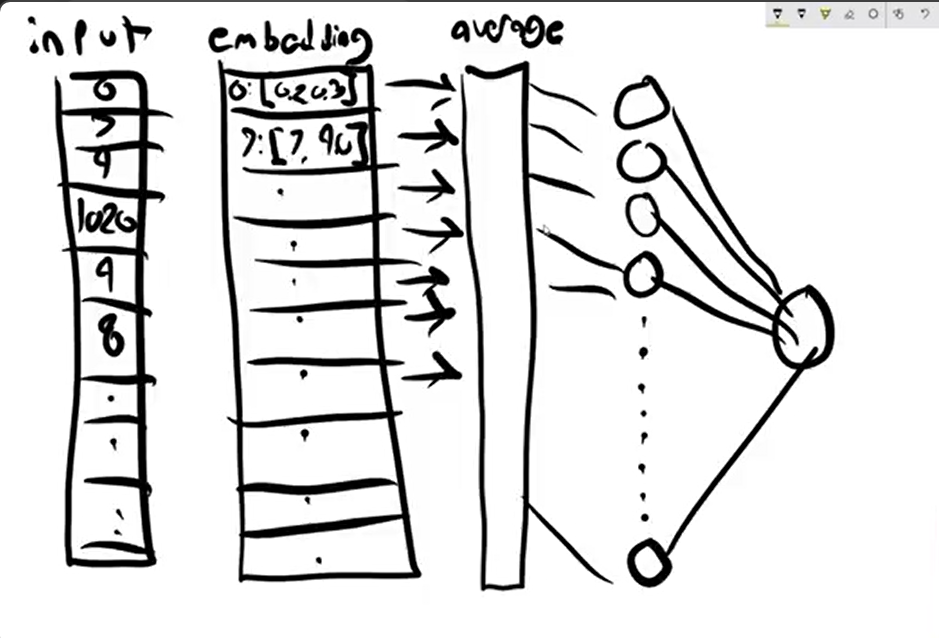

In [15]:
model=keras.Sequential()
model.add(keras.layers.Embedding(10000,16)) #make words vector and make the similar words closer
model.add(keras.layers.GlobalAveragePooling1D()) #put in in a lowe dimension
model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid")) # the output layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model with the Adam optimizer and binary crossentropy loss function
model.compile(
    optimizer="adam",                # Optimizer to use for training
    loss="binary_crossentropy",      # Loss function for binary classification (output is between 0 and 1)
    metrics=["accuracy"]             # Metric to monitor during training
)

# Split the training data into training and validation sets
x_val = train_data[:10000]         # First 10,000 samples for validation
x_train = train_data[10000:]       # Remaining samples for training

y_val = train_label[:10000]       # Corresponding labels for validation data
y_train = train_label[10000:]     # Corresponding labels for training data

# Fit the model to the training data
fitModel = model.fit(
    x_train,                        # Training data
    y_train,                        # Training labels
    epochs=40,                      # Number of epochs to train
    batch_size=512,                 # Number of samples per gradient update
    validation_data=(x_val, y_val), # Validation data and labels
    verbose=1                       # Verbosity mode; 1 for progress bar
)


Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5470 - loss: 0.6912 - val_accuracy: 0.7019 - val_loss: 0.6826
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6780 - loss: 0.6773 - val_accuracy: 0.6977 - val_loss: 0.6617
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7278 - loss: 0.6510 - val_accuracy: 0.7437 - val_loss: 0.6250
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7616 - loss: 0.6092 - val_accuracy: 0.7822 - val_loss: 0.5779
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7947 - loss: 0.5569 - val_accuracy: 0.8030 - val_loss: 0.5251
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8264 - loss: 0.4988 - val_accuracy: 0.8251 - val_loss: 0.4748
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8448 - loss: 0.4477 - val_accuracy: 0.8366 - val_loss: 0.4340
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8548 - loss: 0.4070 - val_accuracy: 0.8415 - v

In [18]:
results=model.evaluate(test_data,test_label)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4908 - loss: 2.2374
[2.24472713470459, 0.49647998809814453]


 **we gonna save the model**

In [19]:
model.save("model.h5")


In [20]:
#loading the model
model=keras.models.load_model("model.h5")